In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape  # 60000萬筆訓練資料 他們是28*28的矩陣 但CNN不吃這一套

(60000, 28, 28)

In [ ]:
### 一個channel,所以(28,28) --> (28,28,1)

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)/255

In [9]:
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [10]:
y_train[87]

9

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 讀入必要的函式

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## Step 1 打造函數學習機

In [15]:
model = Sequential()

In [16]:
model.add (Conv2D(16, (3,3), padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [17]:
## 輸出是16個28*28的矩陣
## 事實上是(28, 28, 16)

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
## output (14, 14, 16)

In [22]:
model.add(Conv2D(32, (3,3), padding='same',
                activation = 'relu'))

In [ ]:
# output (14, 14, 32)

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# output (7, 7, 32)

In [24]:
model.add(Conv2D(64, (3,3), padding='same',
                activation = 'relu'))

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(54, activation='relu'))

In [28]:
model.add(Dense(10, activation='softmax'))  ##輸入和輸出不能改喔

## 看一下我們的神經網路

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
# 3*3(權重) + 1(bias)
# 10*16 = 160

In [30]:
#(3*3*16個channel+1)*32

(3*3*16+1)*32

4640

In [32]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),             ###loss function選不一樣 速度會不一樣準確率也會不一樣
             metrics = ['accuracy'])

## Step 2 FIT

In [33]:
model.fit(x_train, y_train, batch_size=128, epochs = 12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 503us/sample - loss: 0.0898 - accuracy: 0.1882
Epoch 2/12
60000/60000 [==============================] - 28s 474us/sample - loss: 0.0892 - accuracy: 0.2876
Epoch 3/12
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0876 - accuracy: 0.3187
Epoch 4/12
60000/60000 [==============================] - 28s 469us/sample - loss: 0.0727 - accuracy: 0.4648- l
Epoch 5/12
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0328 - accuracy: 0.7923
Epoch 6/12
60000/60000 [==============================] - 29s 483us/sample - loss: 0.0178 - accuracy: 0.8878
Epoch 7/12
60000/60000 [==============================] - 30s 496us/sample - loss: 0.0131 - accuracy: 0.9168
Epoch 8/12
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0107 - accuracy: 0.9329
Epoch 9/12
60000/60000 [==============================] - 31s 510us/sample - loss: 0.0091 - accuracy: 

## Step3 預測

In [34]:
result = model.predict_classes(x_test)

In [35]:
def my_predict(n):
    print("我可愛的CNN預測是", result[n])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap='Greys')

我可愛的CNN預測是 9


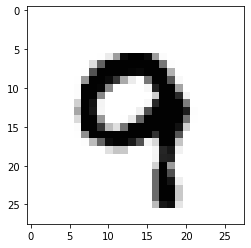

In [36]:
my_predict(99)

In [38]:
from ipywidgets import interact_manual

In [39]:
interact_manual(my_predict, n =(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [41]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 180us/sample - loss: 0.0072 - accuracy: 0.9540


In [42]:
loss, acc = score

In [44]:
print("測試資料正確率", acc)

測試資料正確率 0.954


## 把我們的model存起來 

In [45]:
model.save('myCNNmodel.h5')

In [ ]:
from tensorflow.keras.models import load_model 

In [ ]:
model = load_model('myCNNmodel.h5')

In [ ]:
from tensorflow.keras.datasets import mnist